## 1.  Importing the essential Libraries

These libraries will unable us to perform intial data preprocessing

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='ticks')

pd.set_option('display.max_columns', None)

## 2. Getting the Data: Training and Test data

* df = Training Data
* df_test = Test Data

In [109]:
df = pd.read_csv('C:\\Users\\R558\\Downloads\\TechGig Hackathon\\Hackathon_Working_Data.csv')
df.head(2)

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY


In [110]:
df_test = pd.read_csv('C:\\Users\\R558\\Downloads\\TechGig Hackathon\\Hackathon_Validation_Data.csv')
df_test.head()

,ID,STORECODE,MONTH,GRP
0,1112535,N1,M1,AFTER SHAVE LOTIONS
1,1112539,N1,M1,AGARBATTI & DHOOPBATTI
2,1112543,N1,M1,ALL AIR FRESHNERS(01/03)
3,1112547,N1,M1,ALL IODISED SALT
4,1112551,N1,M1,ANTACIDS


### Dropping the unimportant columns from training data will enable us to make better predictions 

In [111]:
df = df.drop(['DAY', 'BILL_ID', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'], axis=1).sort_values('GRP')
df.head()

,MONTH,STORECODE,BILL_AMT,QTY,VALUE,PRICE,GRP
3965,M1,N4,115.0,1.0,115.0,115.0,AFTER SHAVE LOTIONS
7108,M1,N8,310.0,1.0,120.0,120.0,AFTER SHAVE LOTIONS
23265,M3,N5,295.0,1.0,120.0,120.0,AFTER SHAVE LOTIONS
5418,M1,N7,20.0,2.0,20.0,10.0,AGARBATTI & DHOOPBATTI
22284,M3,N5,489.0,5.0,50.0,10.0,AGARBATTI & DHOOPBATTI


### Converting Dtype from 'object' to 'category' reduces the memory usage

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26985 entries, 3965 to 17778
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   BILL_AMT   26985 non-null  float64
 3   QTY        26985 non-null  float64
 4   VALUE      26985 non-null  float64
 5   PRICE      26985 non-null  float64
 6   GRP        26985 non-null  object 
dtypes: float64(4), object(3)
memory usage: 1.3+ MB


In [113]:
df.MONTH = df.MONTH.astype('category')
df.STORECODE = df.STORECODE.astype('category')
df.GRP = df.GRP.astype('category')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26985 entries, 3965 to 17778
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   MONTH      26985 non-null  category
 1   STORECODE  26985 non-null  category
 2   BILL_AMT   26985 non-null  float64 
 3   QTY        26985 non-null  float64 
 4   VALUE      26985 non-null  float64 
 5   PRICE      26985 non-null  float64 
 6   GRP        26985 non-null  category
dtypes: category(3), float64(4)
memory usage: 1.1 MB


**Doing the same for test data**

In [115]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         2430 non-null   int64 
 1   STORECODE  2430 non-null   object
 2   MONTH      2430 non-null   object
 3   GRP        2430 non-null   object
dtypes: int64(1), object(3)
memory usage: 47.5+ KB


In [116]:
df_test.MONTH = df_test.MONTH.astype('category')
df_test.STORECODE = df_test.STORECODE.astype('category')
df_test.GRP = df_test.GRP.astype('category')

In [117]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         2430 non-null   int64   
 1   STORECODE  2430 non-null   category
 2   MONTH      2430 non-null   category
 3   GRP        2430 non-null   category
dtypes: category(3), int64(1)
memory usage: 28.3 KB


    We can clearly see that converting the Dtype from 'Object' to 'Category' significantly reduced memory usage for both training and testing datasets

### Quick Statistics of the training data

In [118]:
df.describe()

,BILL_AMT,QTY,VALUE,PRICE
count,26985.000000,26985.000000,26985.000000,26985.000000
mean,278.754206,4.105021,67.808551,52.812982
std,541.398504,95.666947,118.005978,84.987730
min,0.000000,0.500000,0.000000,0.000000
25%,40.000000,1.000000,10.000000,10.000000
50%,111.000000,1.000000,30.000000,22.000000
75%,280.000000,2.000000,80.000000,64.000000
max,7292.000000,12000.000000,3150.000000,3150.000000


    We can clearly see that:
    * there is significant difference between the mean and the medians of VALUE & PRICE variables and 
    * Upper Quartile and Max observation for all four numerical valriables
    
    This of course shows that there is skewness in data with potential outliers along which we will see through visualization in next steps

## 3. Visual EDA - Training Data

    We will perform some quick data visualization to gain some useful insights about the training data before building our model

<Figure size 800x400 with 0 Axes>

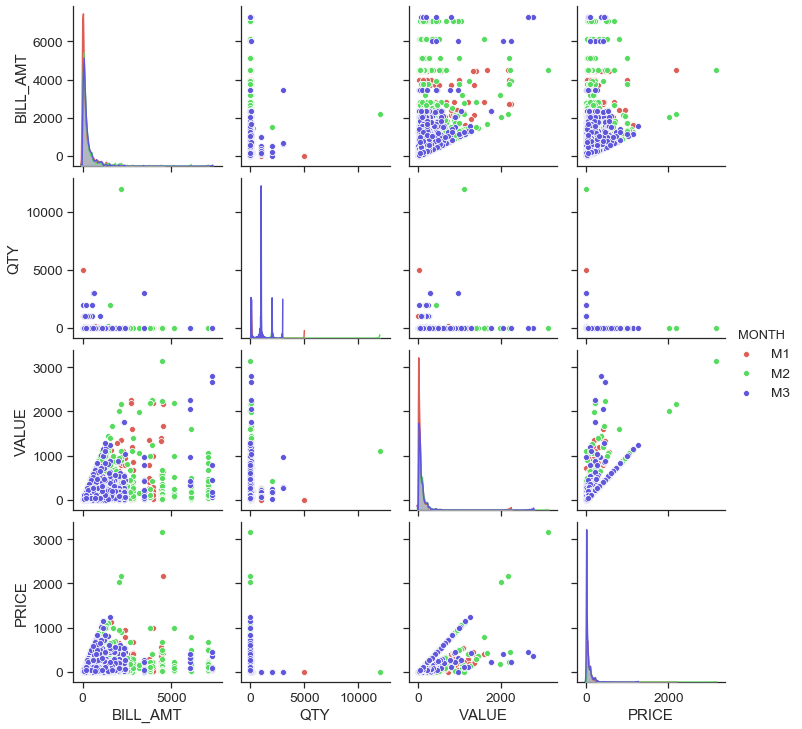

In [119]:
plt.figure(figsize=(4,2), dpi=200)
sns.set(style='ticks', font_scale=1.25)
sns.pairplot(df, hue='MONTH', palette='hls');

    From the above Pairplot we can clearly see that the numerical variables BILL_AMT, QTY, VALUE and PRICE are positively skewed and have linear relationship amongst them. 
    Here we have used categorical variable MONTH as the hue to see the behaviour of the varibales in different MONTHS

#### Next we use some basic bar plots to see the count of the Categorical Variables

**a. MONTH**

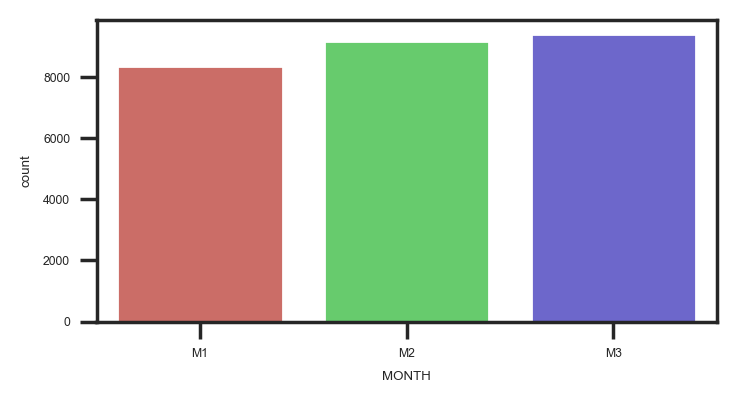

In [120]:
plt.figure(figsize=(4,2), dpi=200)
sns.set(style='ticks', font_scale=0.4)
sns.countplot(x='MONTH', data=df, palette='hls');  

**b. STORECODE**

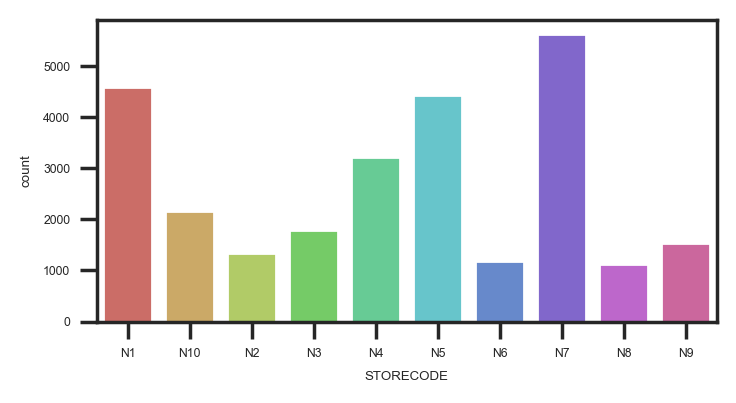

In [121]:
plt.figure(figsize=(4,2), dpi=200)
sns.set(style='ticks', font_scale=0.4)
sns.countplot(x='STORECODE', data=df, palette='hls');

**c. GRP**

In [122]:
plt.figure(figsize=(70, 30), dpi=200)
sns.set(style='ticks', font_scale=3)
sns.countplot(x='GRP', data=df)
plt.xticks(rotation=90);

#### Next we use some boxplots to quickly describe the centre and spread of a distribution
           
    Here we will plot the numerical variables BILL_AMT, VALUE and PRICE against the categorical variable STORECODE to describe the centre and see the spread of the distributionsof these variables. We will also use the categorical variable MONTH as the hue to observe the behaviour of data in different months
            

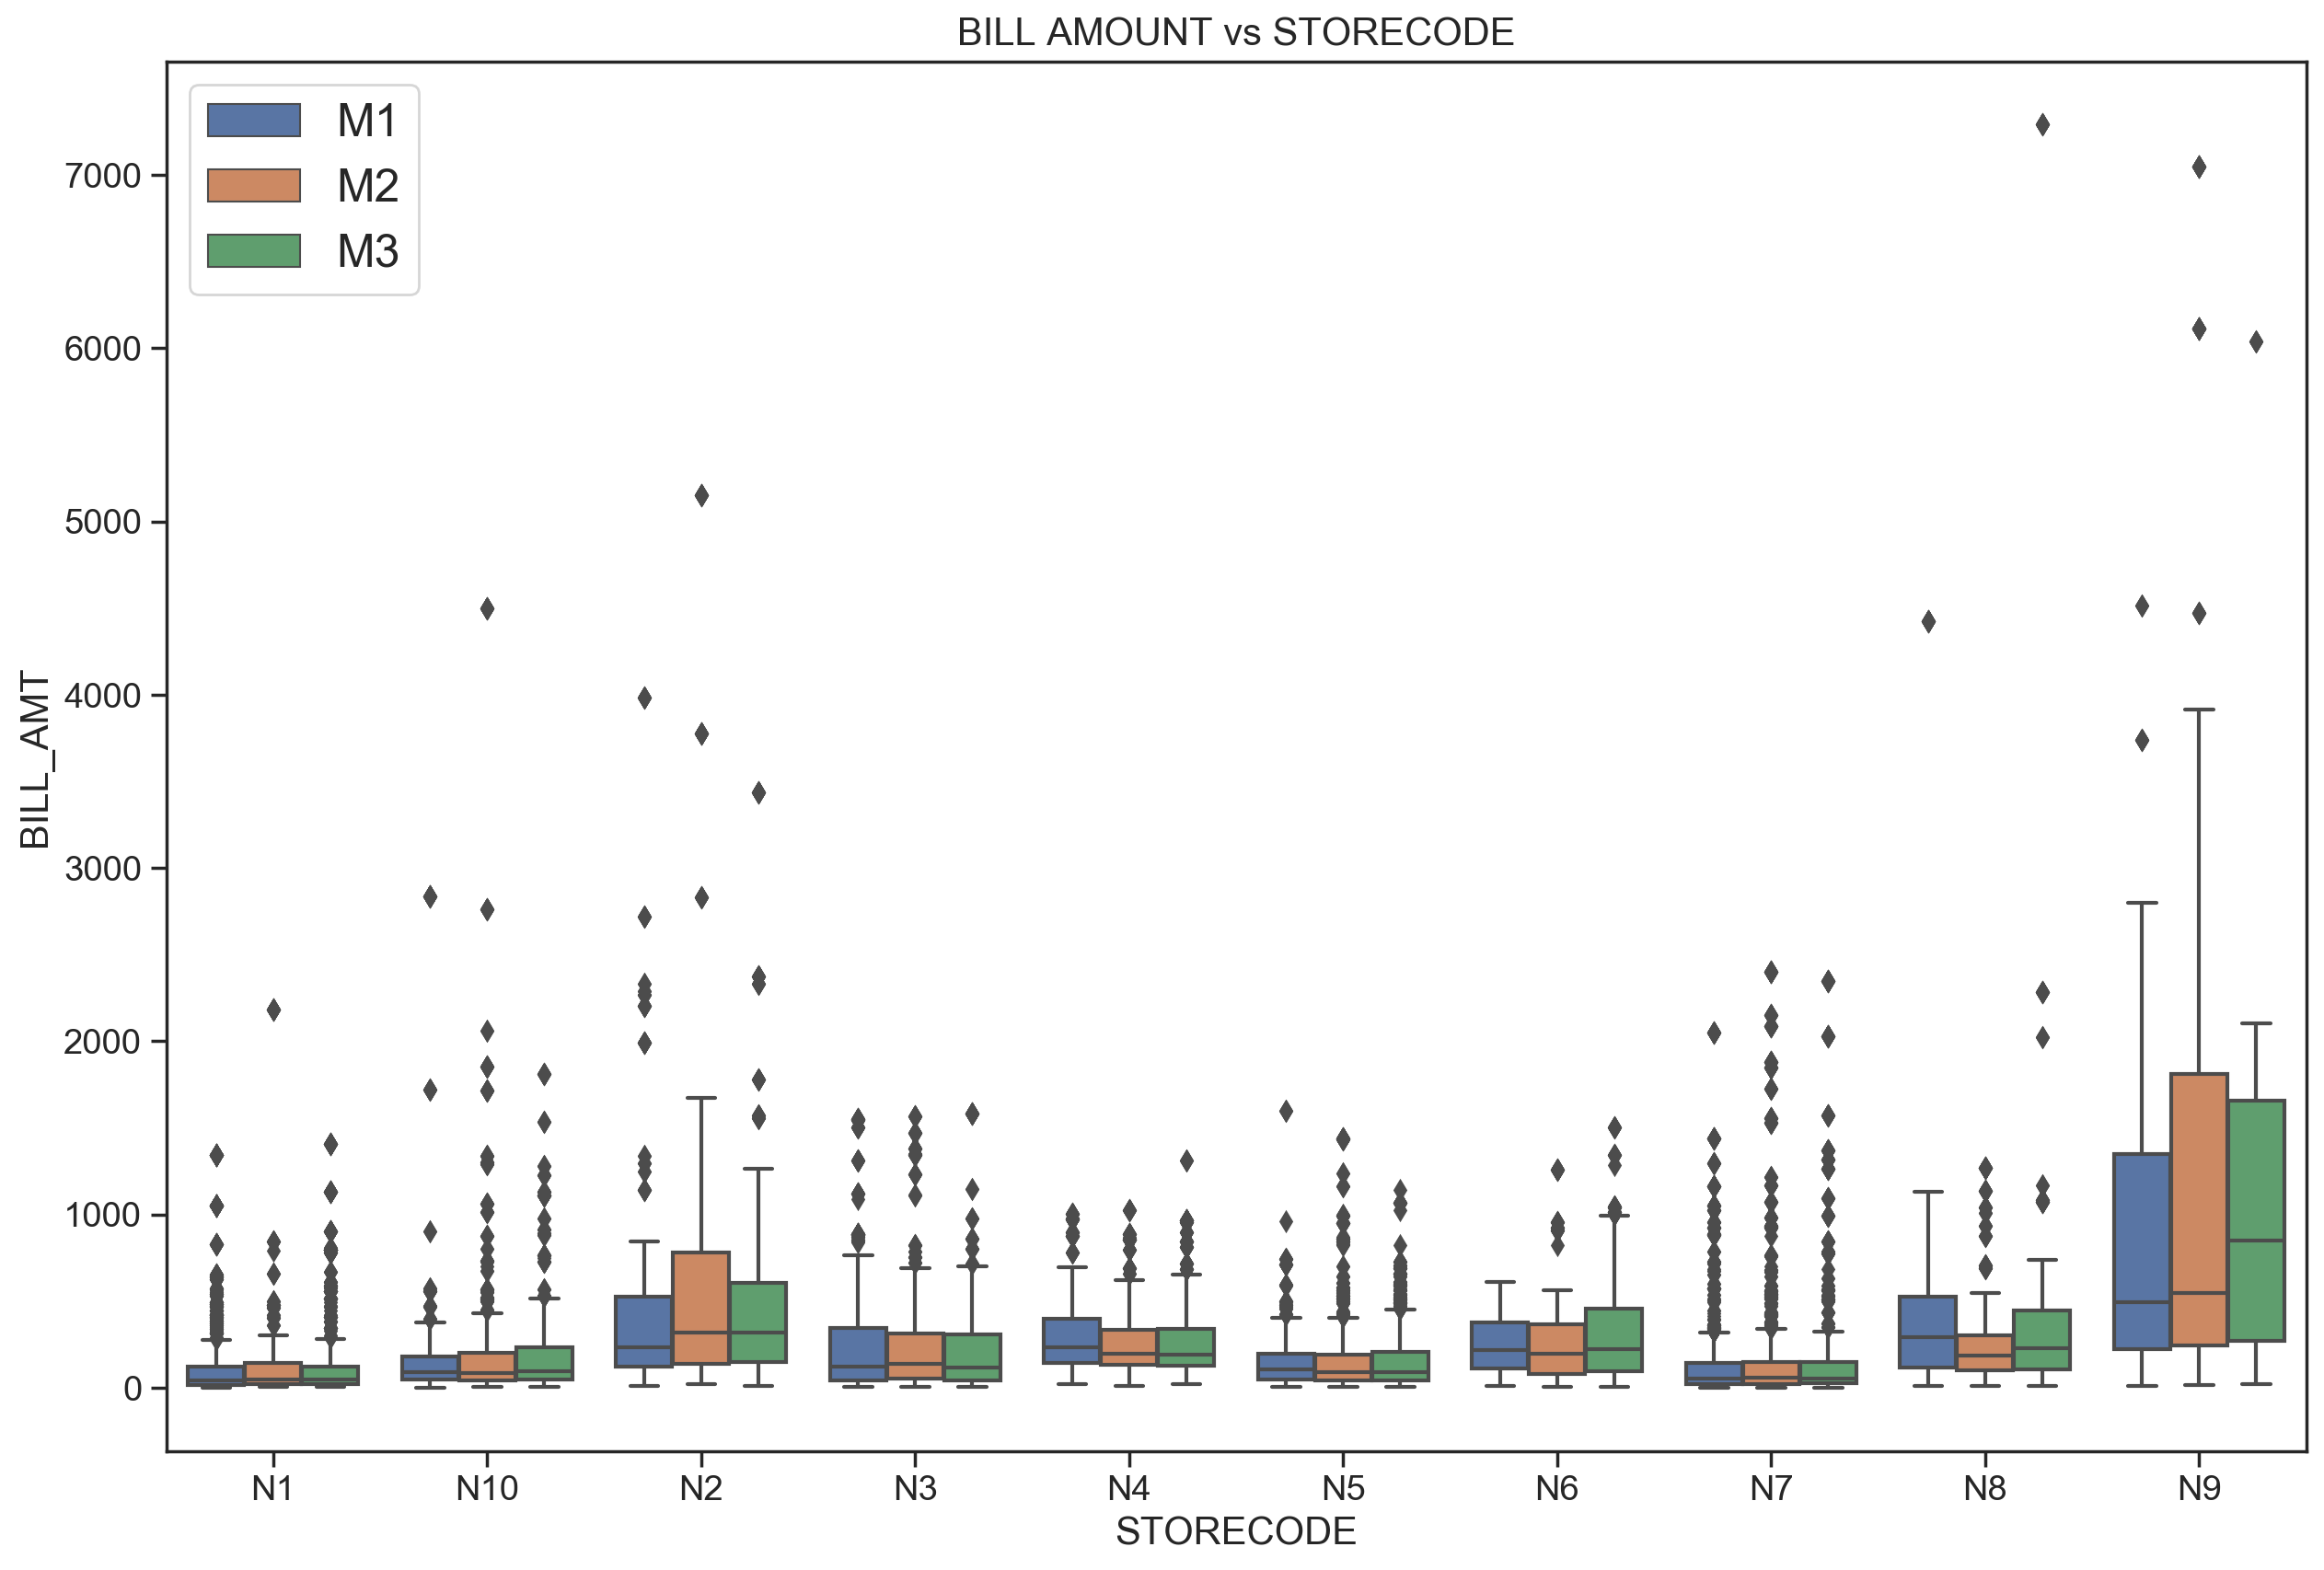

In [123]:
plt.figure(figsize=(15,10), dpi=200)
sns.set(style='ticks', font_scale=1.25)
sns.boxplot(hue='MONTH', y='BILL_AMT', data=df, x='STORECODE')
plt.legend(loc='upper left', fontsize='large')
plt.title('BILL AMOUNT vs STORECODE');

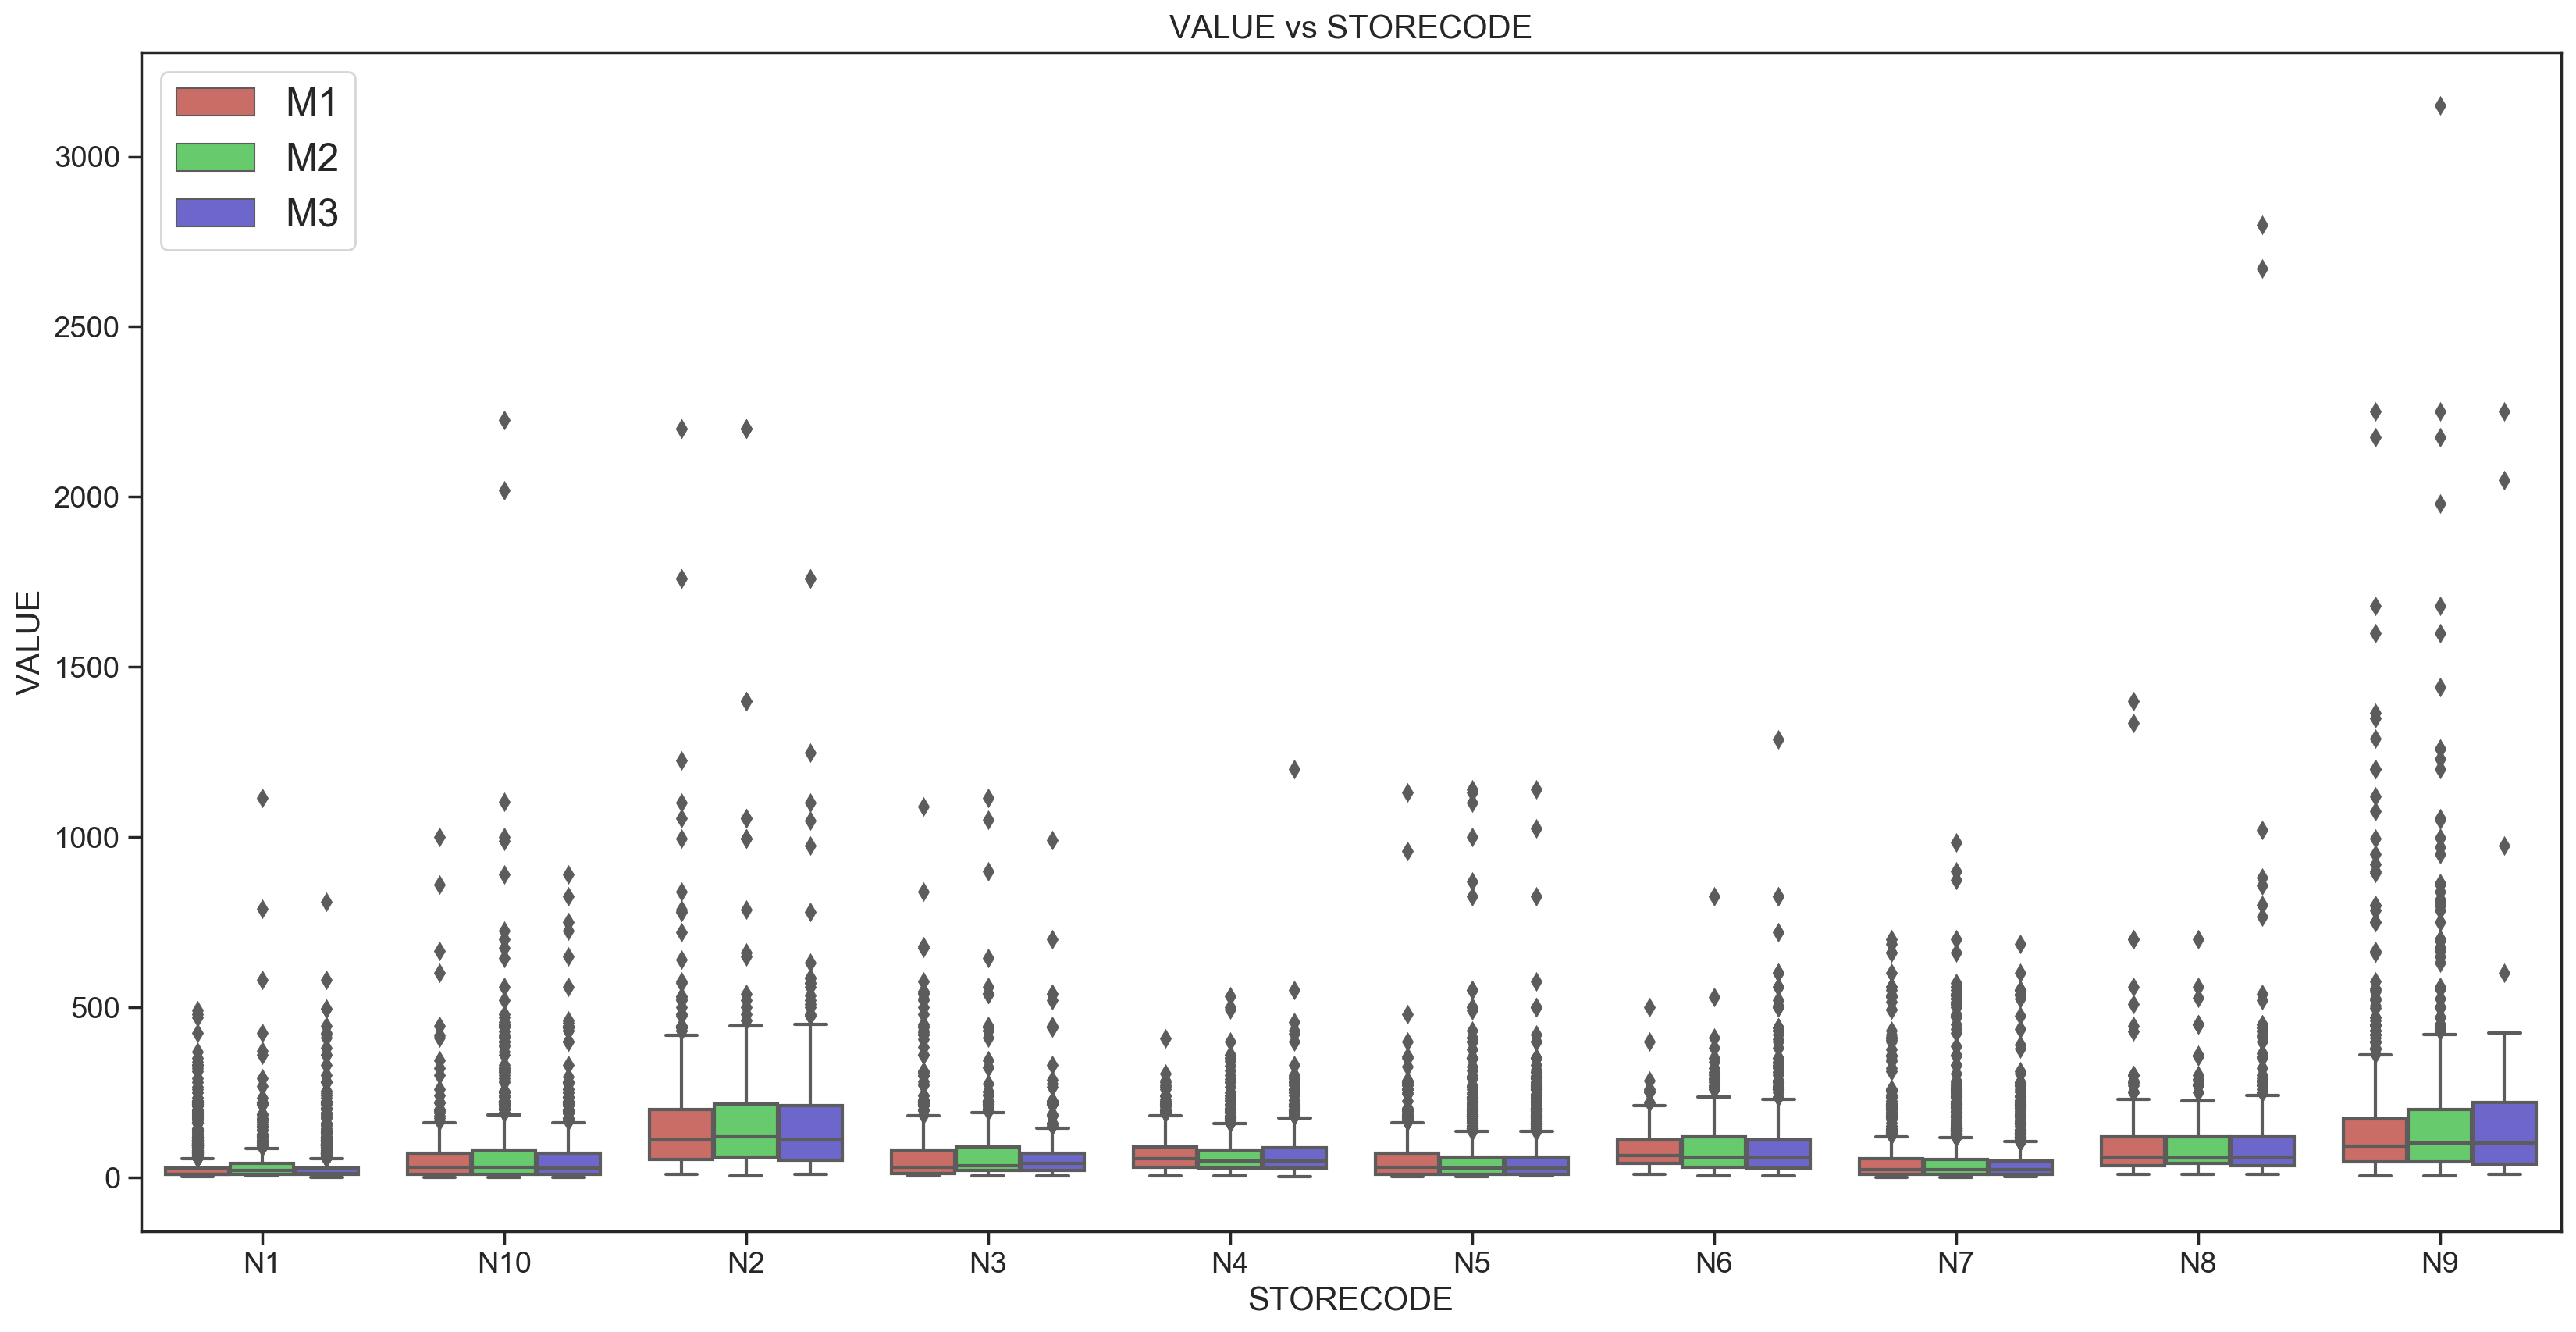

In [124]:
plt.figure(figsize=(20,10), dpi=200)
sns.set(style='ticks', font_scale=1.25)
sns.boxplot(hue='MONTH', y='VALUE', data=df, x='STORECODE', palette='hls')
plt.legend(loc='upper left', fontsize='large')
plt.title('VALUE vs STORECODE');

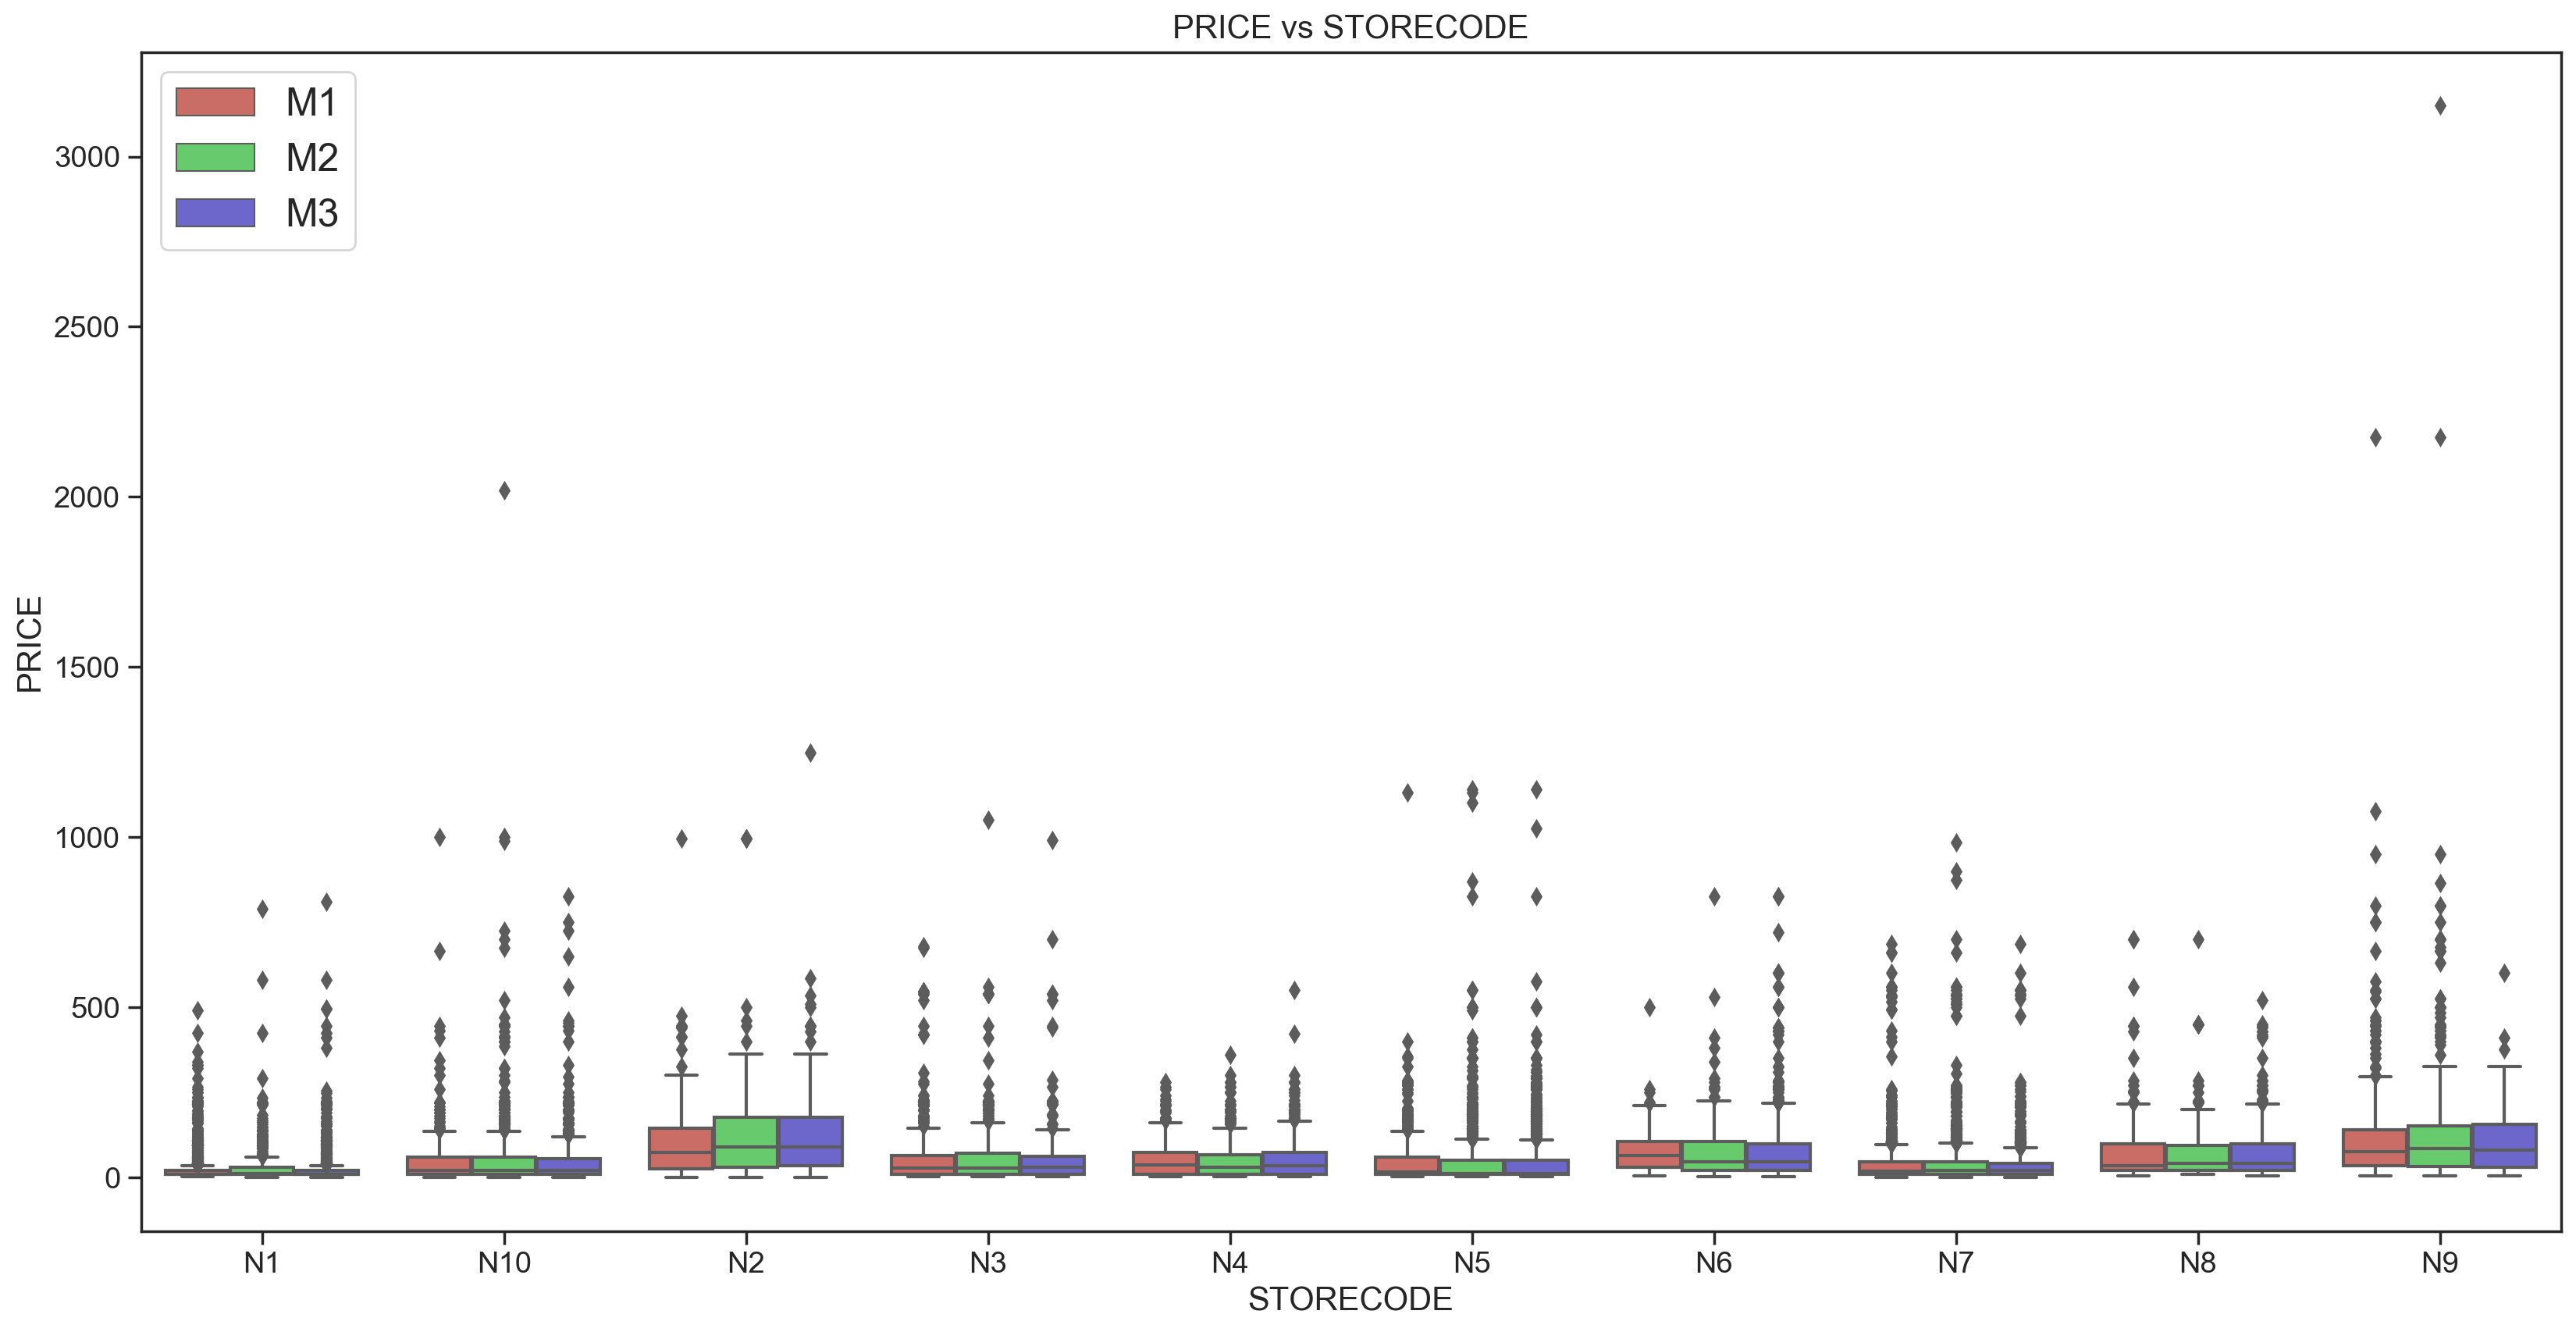

In [125]:
plt.figure(figsize=(20,10), dpi=200)
sns.set(style='ticks', font_scale=1.25)
sns.boxplot(hue='MONTH', y='PRICE', data=df, x='STORECODE', palette='hls')
plt.legend(loc='upper left', fontsize='large')
plt.title('PRICE vs STORECODE');

    From the above Boxplots we can clearly see that there are huge amounts of outliers
    We intend to handle these outliers while buidling our model through Standardization or Normalization

## 4. Model Development 

    Since we have labeled data but no target variable we will use Clustering Algorithms (Unsupervised) to make predictions on our data

#### Selecting the variables for building the model

In [128]:
X = df.iloc[:, 2:6].values

#### Standardizing the numerical data

    By standardizing the numeric data we bring the data under one scale. Here we get values between -3 to +3 with mean=0 and standard deviation = 1

In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

df_scaled = scaler.fit_transform(X)

In [130]:
df_scaled

array([[-3.02470803e-01, -3.24571749e-02,  3.99914683e-01,
         7.31731153e-01],
       [ 5.77141841e-02, -3.24571749e-02,  4.42286203e-01,
         7.90564265e-01],
       [ 3.00076466e-02, -3.24571749e-02,  4.42286203e-01,
         7.90564265e-01],
       ...,
       [ 9.51711793e-01, -1.09780083e-03,  1.22192217e+00,
         2.20056551e-03],
       [ 5.76749986e-01, -3.24571749e-02, -1.25492163e-01,
         2.20056551e-03],
       [-1.89797551e-01, -3.24571749e-02, -1.42440771e-01,
        -2.13326793e-02]])

## We will be using Kmeans Clustering algorithm for our model

    K means is an iterative clustering algorithm that aims to find local maxima in each iteration

In [165]:
from sklearn.cluster import KMeans

In [166]:
kmeans = KMeans(n_clusters=81)

y_kmeans_preds = kmeans.fit_predict(df_scaled)
y_kmeans_preds

array([ 6, 34, 34, ...,  3, 23, 21])

    We chose 81 clusters because we have 81 unique categories in the GRP variable

In [167]:
y_kmeans_preds[:50]

array([ 6, 34, 34, 37, 77, 21, 21,  0, 37, 54, 21,  0,  6, 23, 78, 21,  0,
       21, 37, 80, 80, 80, 21, 23,  0, 80, 21, 73, 21, 73, 34, 66,  0,  0,
       73, 21, 23,  0, 32, 23, 51,  0, 21, 69, 21,  0, 21, 18, 21, 17])

In [171]:
preds = pd.DataFrame(y_kmeans_preds, columns=['TOTALVALUE'])

### Merging the predicted values and validation data

In [186]:
validated_data = df_test.join(preds, how='left')
validated_data.isnull().sum()

ID            0
STORECODE     0
MONTH         0
GRP           0
TOTALVALUE    0
dtype: int64

### Exporting the final file to csv

In [187]:
validated_data.to_csv('TechGig Submission File', index=False)